<a href="https://colab.research.google.com/github/marciagava/Especies/blob/main/EspeciesNoMapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
nome_arquivo = 'sample-formatted.json'
data= {}
i = 0
with open(nome_arquivo, 'r') as f:
    for line in f:
        new_data = json.loads(line)
        data.update({i: new_data})
        i += 1

In [3]:
import pandas as pd

df = pd.DataFrame.from_dict(data, orient='index')

df_taxon = pd.json_normalize(df['taxon'])
df = pd.concat([df, df_taxon], axis=1)
df = df.drop('taxon', axis=1)

df_locations = pd.json_normalize(df['locations'])
df = pd.concat([df, df_locations], axis=1)
df = df.drop('locations', axis=1)

df = df[['year_published','red_list_category','scientific_name','sis_id',
         'kingdom_name','phylum_name','class_name','order_name',
         'family_name']]
df = df.drop_duplicates(subset = 'scientific_name', keep = 'last')

#Escolher uma classe: opcional
classe = 'ACTINOPTERYGII'
df = df[df['class_name'] == classe]
df = df.reset_index(drop=True)

In [4]:
import geopandas as gpd

especiegeo = pd.concat([gpd.read_file('FW_FISH_PART1.shp'), gpd.read_file('FW_FISH_PART2.shp')], ignore_index=True)
especiegeo.dropna(subset='geometry', inplace=True)
especiegeo = especiegeo[['sci_name', 'geometry']].merge(df, left_on='sci_name', right_on='scientific_name', how='inner')

mundo = gpd.read_file('world-administrative-boundaries.shp')

In [5]:
mapeamentoCategorias = {'LC': 'Menor Preocupação',
                        'LR/lc': 'Menor Preocupação',
                        'EN': 'Ameaçado',
                        'E': 'Ameaçado',
                        'NT': 'Pouco Ameaçado',
                        'LR/nt': 'Pouco Ameaçado',
                        'LR/cd': 'Pouco Ameaçado',
                        'VU': 'Vulnerável',
                        'V': 'Vulnerável',
                        'RE': 'Extinto Regionalmente',
                        'DD': 'Sem Dados de Risco',
                        'I': 'Sem Dados de Risco',
                        'K': 'Sem Dados de Risco',
                        'R': 'Sem Dados de Risco',
                        'CR': 'Criticamente Ameaçado',
                        'NA': 'Risco Não Avaliado',
                        'NE': 'Risco Não Avaliado',
                        'EX': 'Extinto',
                        'Ex': 'Extinto',
                        'Ex?': 'Extinto',
                        'EW': 'Extinto na Natureza'}

In [ ]:
#especiegeo['scientific_name'].unique()

Espécies sugeridas: Campylomormyrus curvirostris, Neobola moeruensis, Garra wanae, Nipponocypris sieboldii, Barbodes binotatus, Pseudobarbus erubescens, Pungu maclareni, Melanocharacidium blennioides, Barbodes palata, Characodon garmani

In [7]:
#especie = input("Escolha a espécie: ")

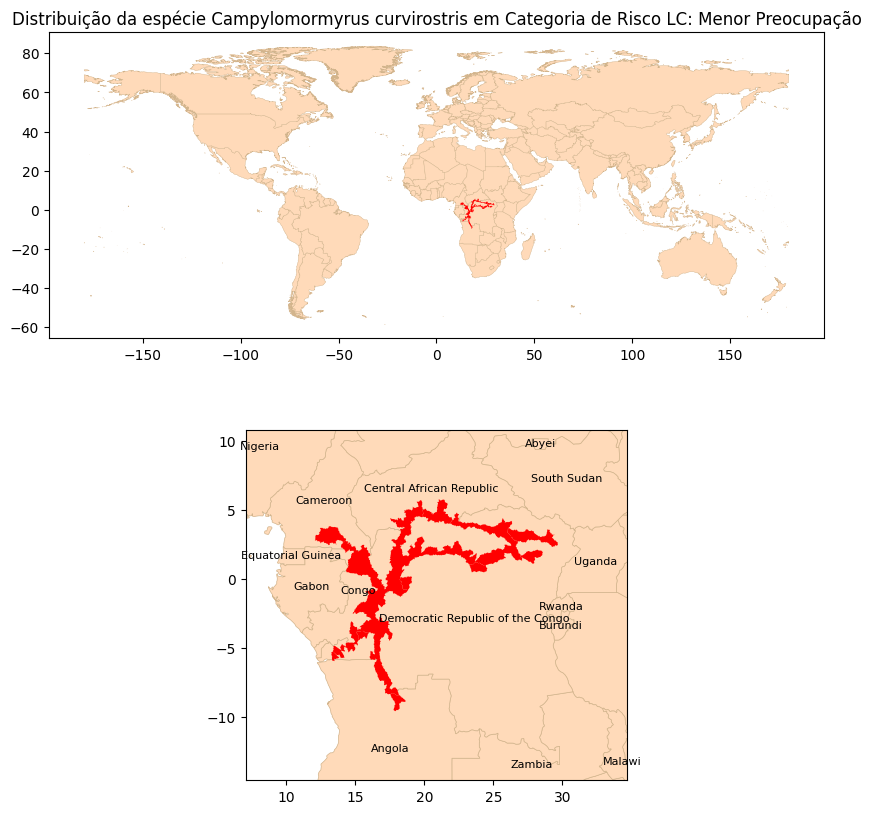

In [6]:
especie = 'Campylomormyrus curvirostris'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

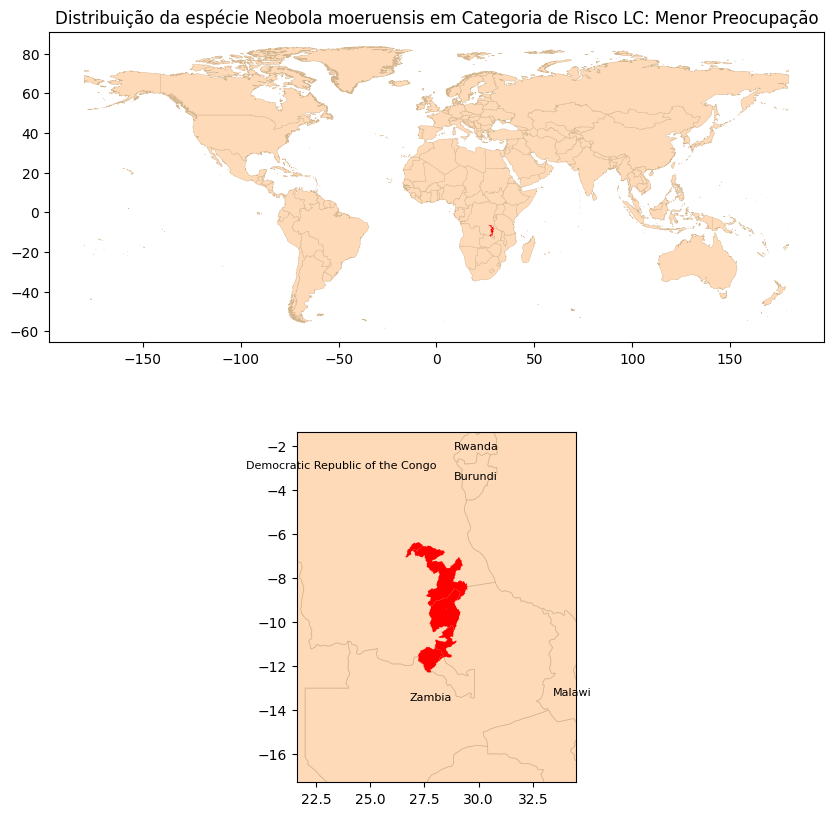

In [7]:
especie = 'Neobola moeruensis'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

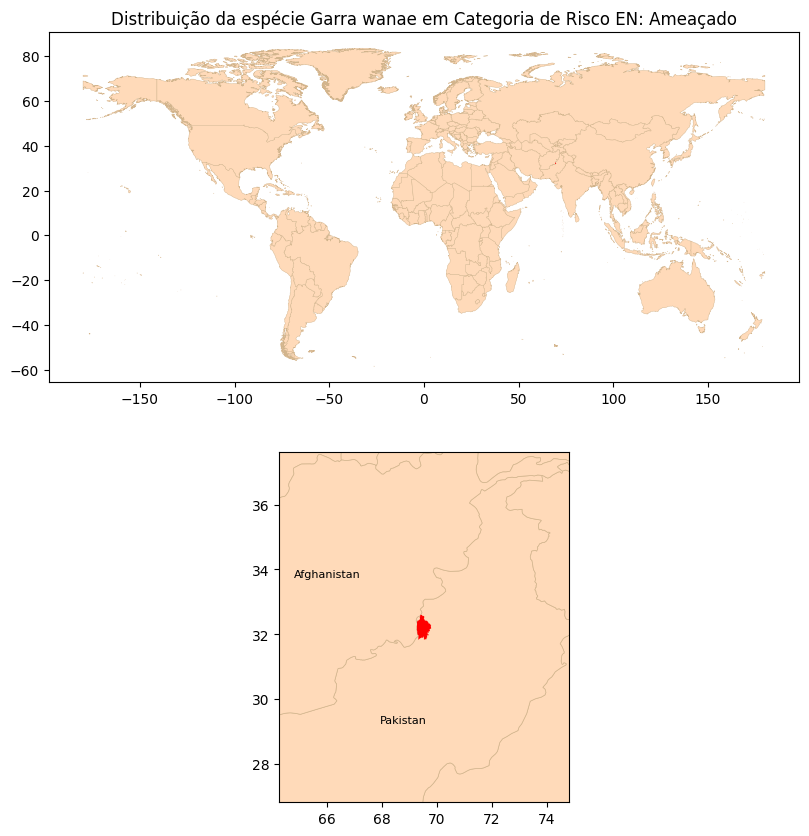

In [8]:
especie = 'Garra wanae'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

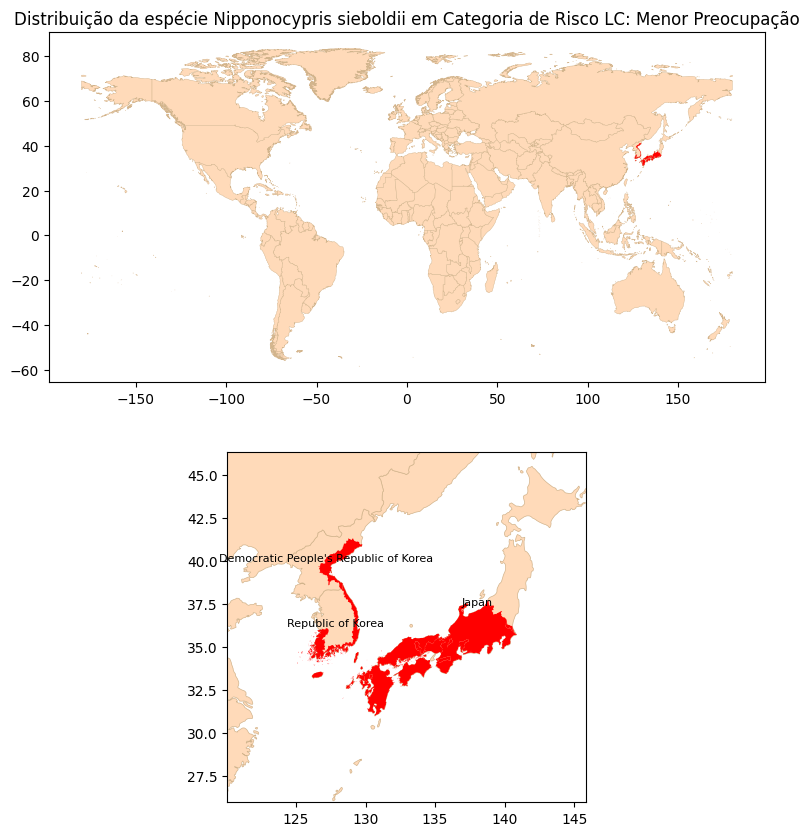

In [9]:
especie = 'Nipponocypris sieboldii'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

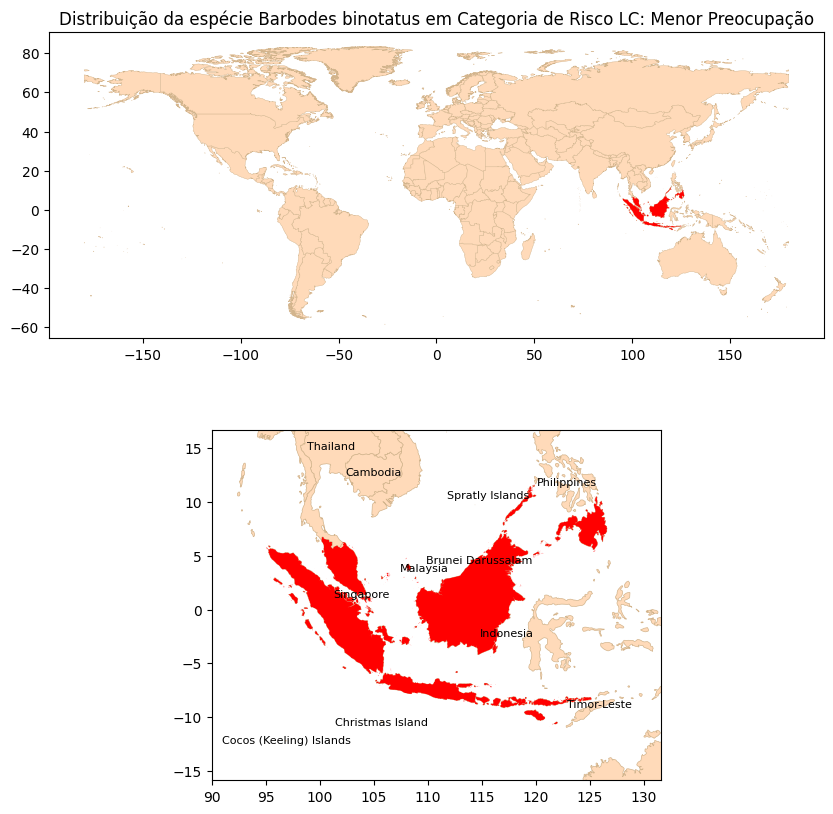

In [10]:
especie = 'Barbodes binotatus'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

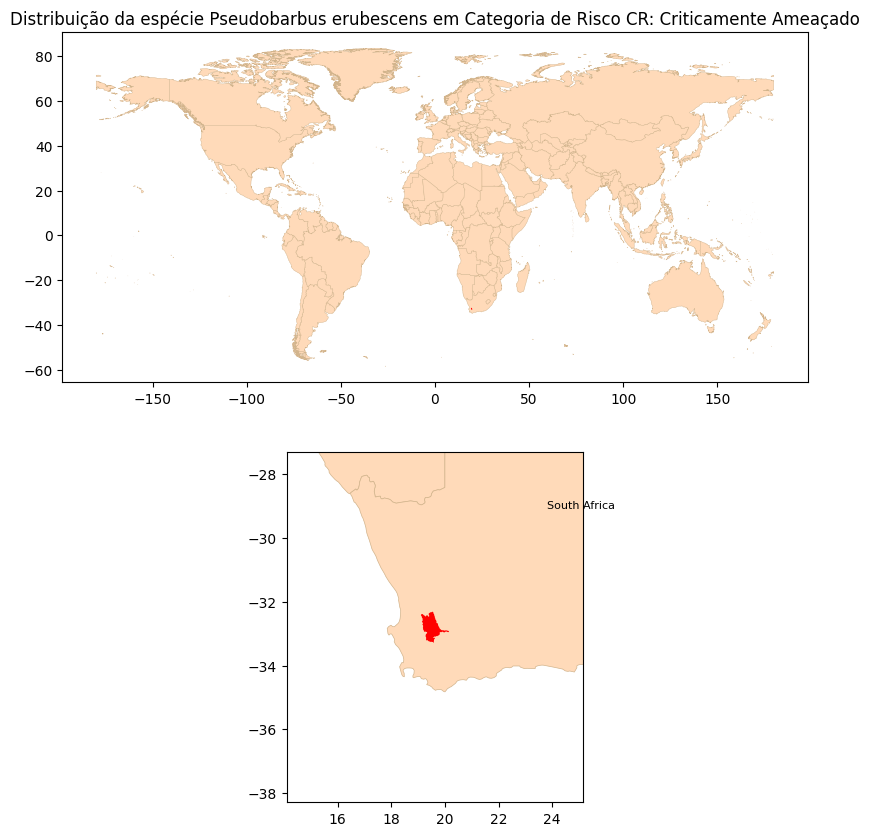

In [11]:
especie = 'Pseudobarbus erubescens'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

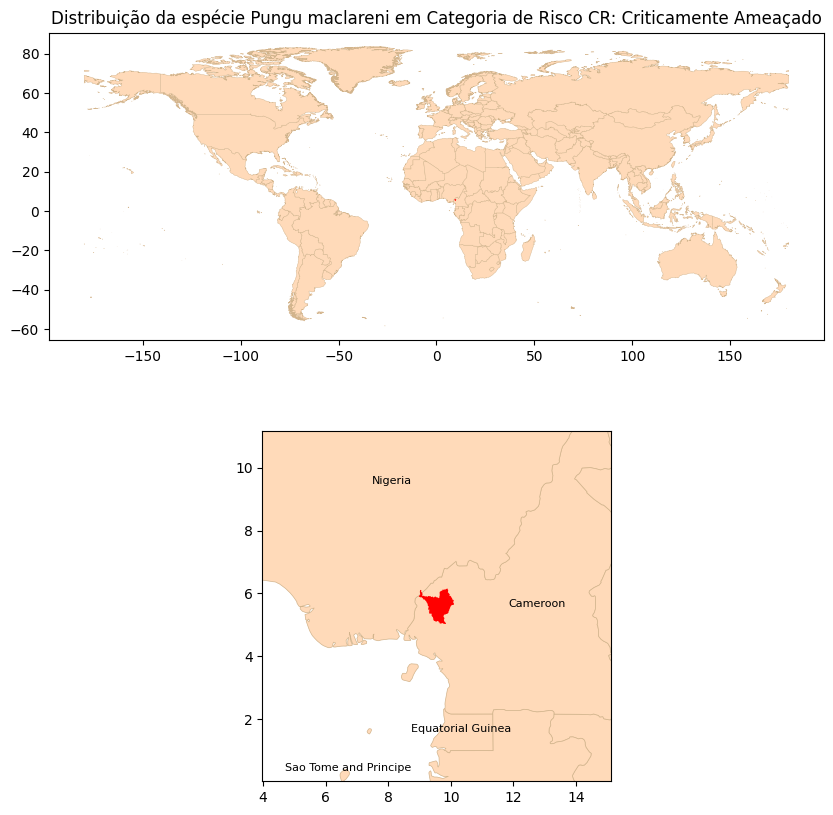

In [12]:
especie = 'Pungu maclareni'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

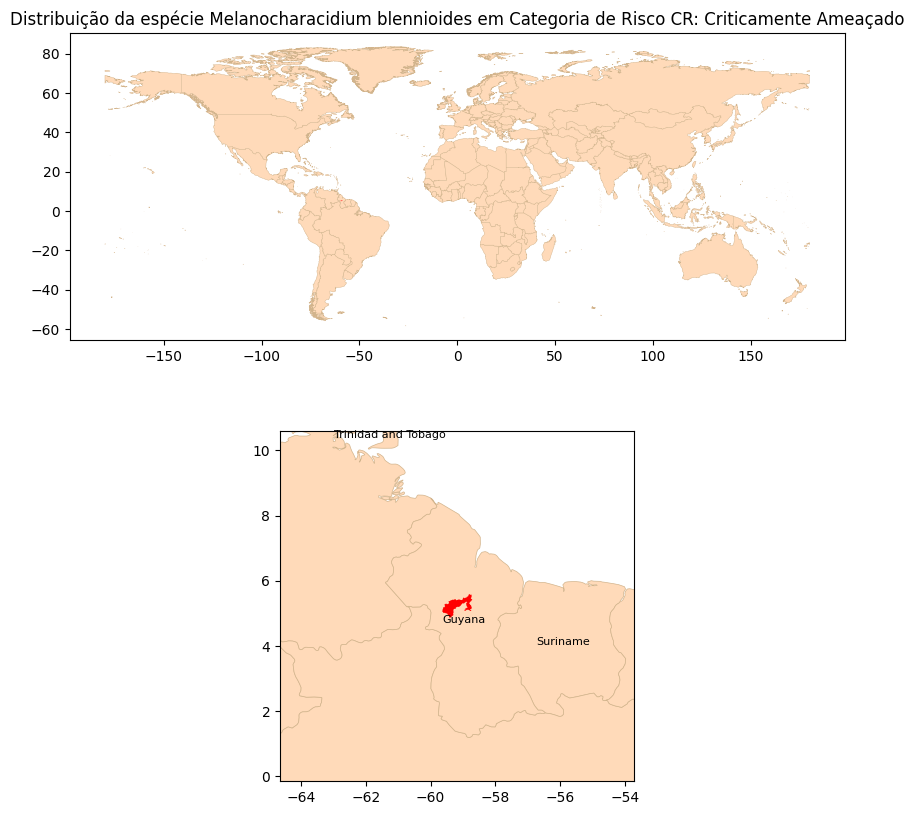

In [13]:
especie = 'Melanocharacidium blennioides'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

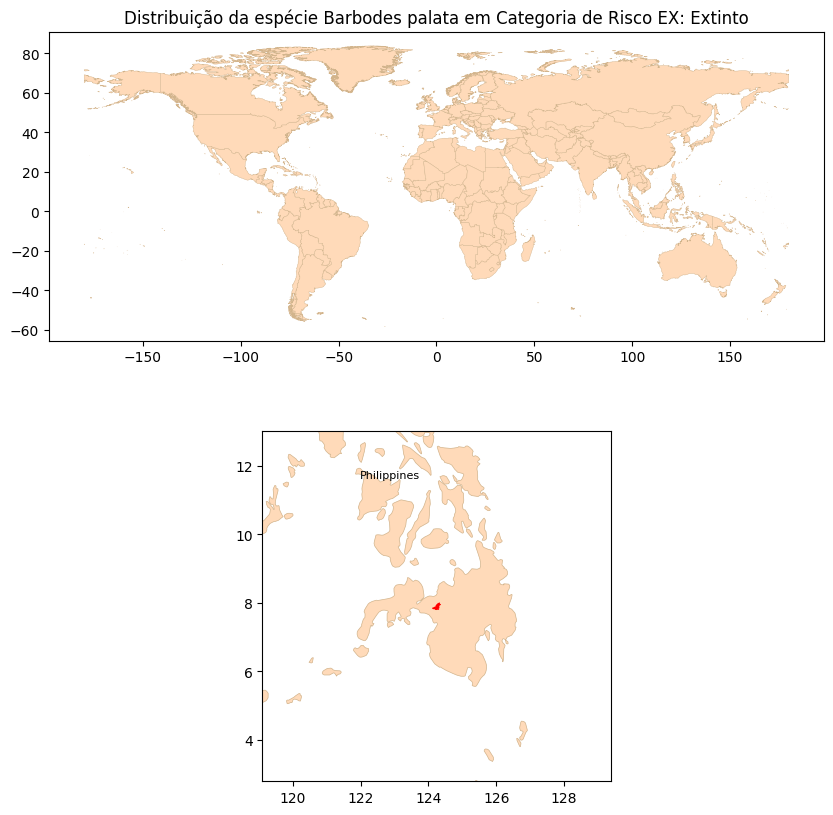

In [14]:
especie = 'Barbodes palata'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()

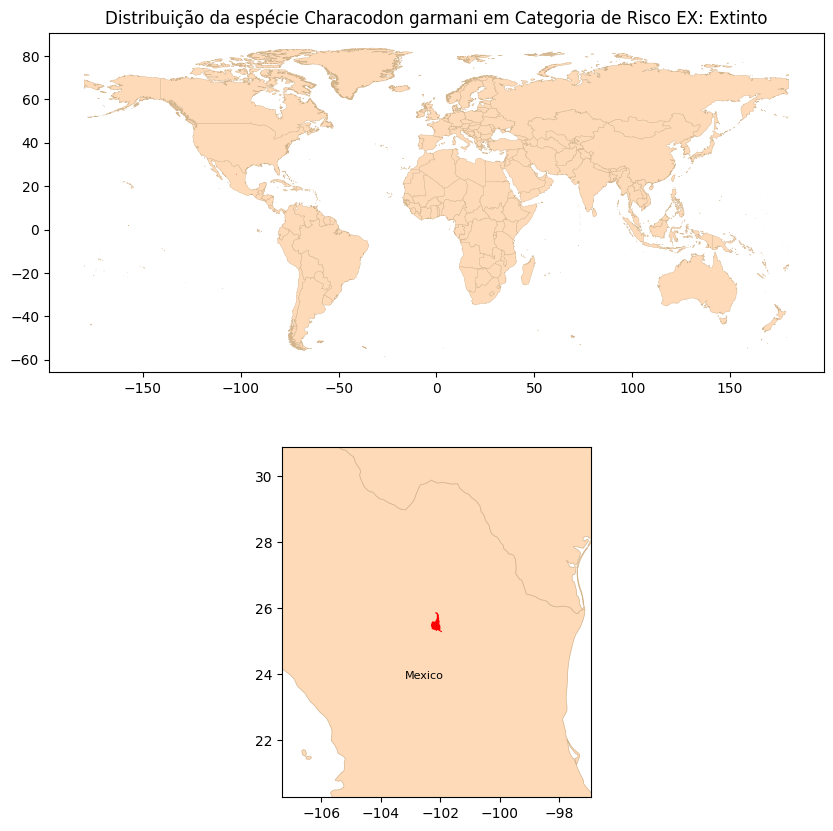

In [15]:
especie = 'Characodon garmani'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

if especie not in especiegeo['scientific_name'].unique():
    print("Espécie não encontrada")
    exit()

else:

  catRisco = [especiegeo[especiegeo['scientific_name'] == especie]][0].reset_index().iloc[0]['red_list_category']
  catRiscopt = mapeamentoCategorias[catRisco]

  fig, axes = plt.subplots(2, 1, figsize = (10,10))

  #primero mapa
  axes[0].set_aspect('equal')
  mundo.plot(ax=axes[0], color='peachpuff', edgecolor='tan', linewidth=0.3)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[0], color='red')
  axes[0].set_title('Distribuição da espécie ' + especie + ' em Categoria de Risco ' + catRisco + ': ' + catRiscopt)

  #segundo mapa
  lonmin, latmin, lonmax, latmax = especiegeo[especiegeo['scientific_name'] == especie].total_bounds
  lonmin, latmin, lonmax, latmax = lonmin - 5, latmin - 5, lonmax + 5, latmax + 5
  axes[1].set_aspect('equal')
  mundo.plot(ax=axes[1], color='peachpuff', edgecolor='tan', linewidth=0.5)
  especiegeo[especiegeo['scientific_name'] == especie].plot(ax=axes[1], color='red')
  for x, y, label in zip(mundo.geometry.centroid.x, mundo.geometry.centroid.y, mundo.name):
      if x >= lonmin and x <= lonmax and y >= latmin and y <= latmax:
        axes[1].text(x, y, label, fontsize=8, ha='center', va='center')
  axes[1].axis([lonmin, lonmax, latmin, latmax])


  plt.show()